# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Segunda Lista Entregável 13/12/2020

## Prof. Luis Gustavo Nonato  

ICMC-USP

----

## <font color='blue'> Instruções para Lista Entregável 2</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar e entregar a segunda lista de exercícios:

1. Baixe e renomeie o notebook `SME241_lista_2.ipynb` com seu nome e número USP
2. Uma vez que tenha concluído a lista, faça upload do notebook (renomeado) no diretório `Entrega Listas Exercicios/Lista 2`

Em todas as questões abaixo você precisa marcar a alternariva correta e também incluir o código Python que calcula a resposta da questão. Para marcar a alternativa que julgue correta, inclua um sinal (X) na frente da mesma. Por exemplo:

a) 123<br>
b) 234 (X)<br>
c) 345<br>
d) 456

</font>

<font color='red'> Não esqueça de renomear o arquivo com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome**: Ana Rosa Almeida do Nascimento

**No USP**: 12610559

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna a série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [2]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)

#### 1.1) (0.5 ponto) 
Faça o gráfico do número do número de partículas utilizando a discretização no eixo $x$ como sendo números inteiros de 1 a 365.

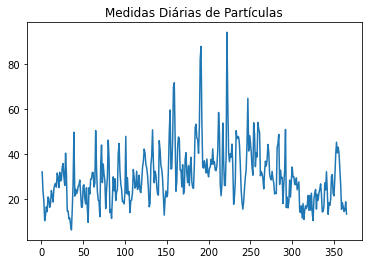

In [3]:
# Solução

# Discretizando o intervalo 1 - 365 no eixo X
eixo_x = np.linspace(1,365, num = 365).astype(int)

# Lendo os valores no dataset
particulas = read_particulas()

fig, ax = plt.subplots()
plt.title('Medidas Diárias de Partículas')
ax.plot(eixo_x, particulas)

#### 1.2) (2 pontos)
Considere a função 

$$
f(t)=a_0+a_1\cos(a_3t)+a_2\sin(a_4t)
$$

como modelo para a distribuição de partículas. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo que o modelo se ajuste aos dados. Para isso utilize o método dos gradientes descendentes com as seguintes especificações:

$$t\in[0,2\pi]\\
\begin{array}{rl}
n & = & 50000 \quad \mbox{(número de passos no método)}\\
h & = & 10^{-7} \quad \mbox{(tamanho do passo )}\\
[a^0_0,a^0_1,a^0_2,a^0_3,a^0_4] & = &[1,1,1,1,1] \quad \mbox{(condição inicial)}
\end{array}
$$

Qual o valor encontrado para $a_0,a_1,a_2,a_3$ e $a_4$?

a) $a_0=24.00,\, a_1=8.48,\, a_2=2.26,\, a_3=3.60,\, a_4=2.57$<br>
b) $a_0=30.01,\, a_1=6.78,\, a_2=5.76,\, a_3=-3.50,\, a_4=1.70$<br>
c) $a_0=19.54,\, a_1=3.78,\, a_2=15.77,\, a_3=1.73,\, a_4=0.47$ (X)<br>
d) $a_0=12.30,\, a_1=2.81,\, a_2=6.22,\, a_3=6.61,\, a_4=5.57$

In [4]:
#Solucao

## Resposta

Minimizar erro: 
$$E = \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)^2}$$
Temos o gradiente:
$$\frac{dE}{da_0} = 2 \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)}$$
$$\frac{dE}{da_1} = 2 \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)(cos(a_3 . t))}$$
$$\frac{dE}{da_2} = 2 \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)(sin(a_4 . t))}$$
$$\frac{dE}{da_3} = 2 \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)(-t . sin(a_3 . t))}$$
$$\frac{dE}{da_4} = 2 \sum{(a_0 + a_1 . cos(a_3 . t) + a_2 . sin(a_4 . t) - Y)(t.cos(a_4 . t))}$$

In [5]:
# Definindo o gradiente:
def grad(a, t, y):
    de_a0 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - y)
    de_a0 = np.sum(de_a0)
    
    de_a1 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - y)*(np.cos(a[3]*t))
    de_a1 = np.sum(de_a1)
    
    de_a2 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - y)*(np.sin(a[4]*t))
    de_a2 = np.sum(de_a2)
    
    de_a3 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - y)*(-t*np.sin(a[3]*t))
    de_a3 = np.sum(de_a3)
    
    de_a4 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - y)*(t*np.cos(a[4]*t))
    de_a4 = np.sum(de_a4)
    
    return np.array([de_a0, de_a1, de_a2, de_a3, de_a4])

In [6]:
t = np.linspace(0, 2*np.pi, particulas.size)

# Numero de passos
n = 50000
h = 10**(-7)
particulas_modelagem = np.zeros((5,n))
particulas_modelagem[:, 0] = [1,1,1,1,1]

for i in range(1, n):
    particulas_modelagem[:, i] = particulas_modelagem[:, i-1] - h*grad(particulas_modelagem[:,i-1], t, particulas)

print(particulas_modelagem[:,n-1])

[19.5375074   3.77713877 15.7717687   1.73064139  0.46914217]


#### 1.3) (0.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

In [15]:
# Solucao

# Pegando parametros
a = particulas_modelagem[:,-1]

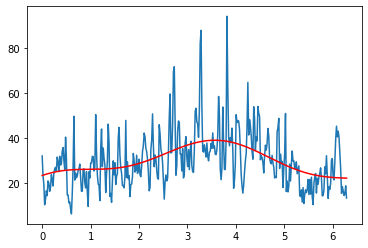

In [30]:
fig, ax = plt.subplots()
ax.plot(t, particulas)
ax.plot(t, a[0] + a[1] * np.cos(a[3]*t) + a[2] * np.sin(a[4]*t), color = 'red')

#### 1.4) (2 pontos)
Utilizando o modelo calculado na questão 1.2), faça uma previsão de qual seria o número de partículas nos 60 dias que sucedem o final da amostragem. Faça o gráfico da previsão dos 60 dias que sucedem o final da amostragem. Qual o número aproximado de particulas previsto para o último dia da predição? 

a) 31<br>
b) 22 <br>
c) 19 (X)<br>
d) 53

Text(9, 80, 'Valor Aproximado no dia 425 é 18.777506461095196')

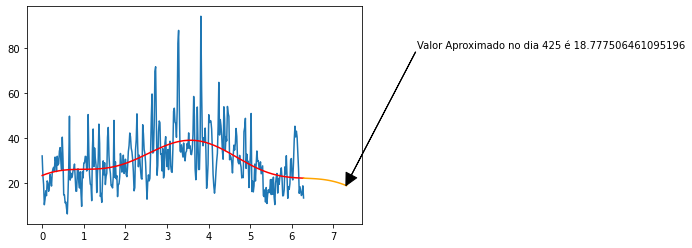

In [49]:
#Solucao

#O valor predito pelo modelo para o dia 425 é próximo de 19

#Predição futura para os próximos 60 dias

t_pred = np.linspace(2*np.pi, 2*np.pi + 120*np.pi/365, 61)

fig, ax = plt.subplots()
ax.plot(t, particulas)
ax.plot(t, a[0] + a[1] * np.cos(a[3]*t) + a[2] * np.sin(a[4]*t), color = 'red')
ax.plot(t_pred, a[0] + a[1] * np.cos(a[3]*t_pred) + a[2] * np.sin(a[4]*t_pred), color = 'orange')

valor_dia60 = a[0] + a[1] * np.cos(a[3]*t_pred[-1]) + a[2] * np.sin(a[4]*t_pred[-1])

plt.annotate(f'Valor Aproximado no dia 425 é {valor_dia60}', 
             xy=(7.3,18.78), xytext=(9,80),
             arrowprops=dict(facecolor='black', width=0.2),)

### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$. 

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

<a list of 4 text.Text objects>

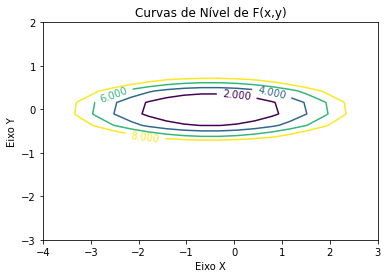

In [68]:
# Solucao

eixo_x = np.linspace(-4,3,20)
eixo_y = np.linspace(-3,2,20)
eixo_x, eixo_y = np.meshgrid(eixo_x, eixo_y)
eixo_z = eixo_x**2 + 16*eixo_y**2 + eixo_x

fig, ax = plt.subplots()
contorno = ax.contour(eixo_x, eixo_y, eixo_z, levels = [2, 4, 6, 8])
ax.set_title('Curvas de Nível de F(x,y)')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.clabel(contorno)

#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53] (X)<br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

### Lagrange

$f(x,y) = x^2 + 16.y^2 + x$
com a restrição $xy - 1 = 0$

$$
\nabla F = \nabla f - \lambda \nabla g
$$
$$
\nabla F = (2x + 1, 32y) - \lambda(y,x)
$$
$$
\nabla F = 0\, -> \,(2x + 1, 32y) - \lambda(y,x) = (0,0)
$$

$$
J_{(x,y,\lambda)} = 
\begin{bmatrix}
  2 & -\lambda & -y \\ 
  -\lambda & 32 & -x \\ 
  y & x & 0 
\end{bmatrix}
$$

In [80]:
# Solucao

#chute inicial = [2, 1, 1]

def matriz_jacob(matriz):
    l0 = [2, -matriz[2], -matriz[1]]
    l1 = [-matriz[2], 32, -matriz[0]]
    l2 = [matriz[1], matriz[0], 0]
    
    return np.array([l0,l1,l2])

def metodo_newton(chute_inicial):
    n = 100
    matriz = np.zeros((3,n))
    matriz[:, 0] = chute_inicial
    
    h = np.zeros(3)

    for i in range(1, n):
        h1 = 2*matriz[0,i-1] + 1 - matriz[2,i-1]*matriz[1,i-1]
        h2 = 32*matriz[1,i-1] - matriz[2,i-1]*matriz[0,i-1]
        h3 = matriz[0,i-1]*matriz[1,i-1] - 1
        h[:] = [h1,h2,h3]
        j = matriz_jacob(matriz[:,i-1])
        delta = np.linalg.solve(j, -h)
        matriz[:,i] = matriz[:,i-1] + delta
    return matriz

pontos = metodo_newton([2,1,1])

if (np.all(np.abs(pontos[:,-1]-pontos[:,-2])<1e-7)):
    print('A solução é:',pontos[0:2,-1])
else:
    print('Não achou o ponto')

A solução é: [1.88579892 0.53027923]


#### 2.3) (1.5 ponto)
Qual é a curva de nível de $f(x,y)$ que é tangente à curva $xy=1$. Faça o gráfico das curvas e do ponto de tangência.

a) 7.38 <br>
b) 8.10 <br>
c) 9.94 (X)<br>
d) 10.51

In [65]:
# Solucao

#O ponto de tangencia foi [1.89, 0.53], substituindo na equação f(x,y), encontramos:
# f(1.89, 0.53) = 9.96

def f(x,y):
    return x**2 + 16*y**2 + x

print(f(1.89, 0.53))

9.956500000000002


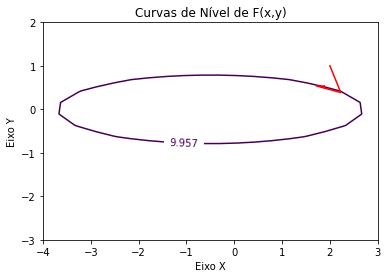

In [79]:
fig, ax = plt.subplots()

eixo_x = np.linspace(-4,3,20)
eixo_y = np.linspace(-3,2,20)
eixo_x, eixo_y = np.meshgrid(eixo_x, eixo_y)
eixo_z = eixo_x**2 + 16*eixo_y**2 + eixo_x

contorno = ax.contour(eixo_x, eixo_y, eixo_z, levels = [f(1.89, 0.53)])
ax.set_title('Curvas de Nível de F(x,y)')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.clabel(contorno)

ax.plot(pontos[0,:], pontos[1,:], color = 'red')